In [1]:
import cv2

In [38]:
from glob import glob

In [39]:
images =glob('../images/*.jpg')

In [40]:
images

['../images/temp_1308.jpg',
 '../images/temp_1250.jpg',
 '../images/temp_1180.jpg',
 '../images/temp_1223.jpg',
 '../images/temp_1353.jpg',
 '../images/temp_502.jpg',
 '../images/temp_500.jpg',
 '../images/temp_501.jpg',
 '../images/temp.jpg']

In [41]:
imgs = [cv2.imread(img) for img in images]

In [42]:
from IPython.display import Image

In [43]:
from PIL import Image

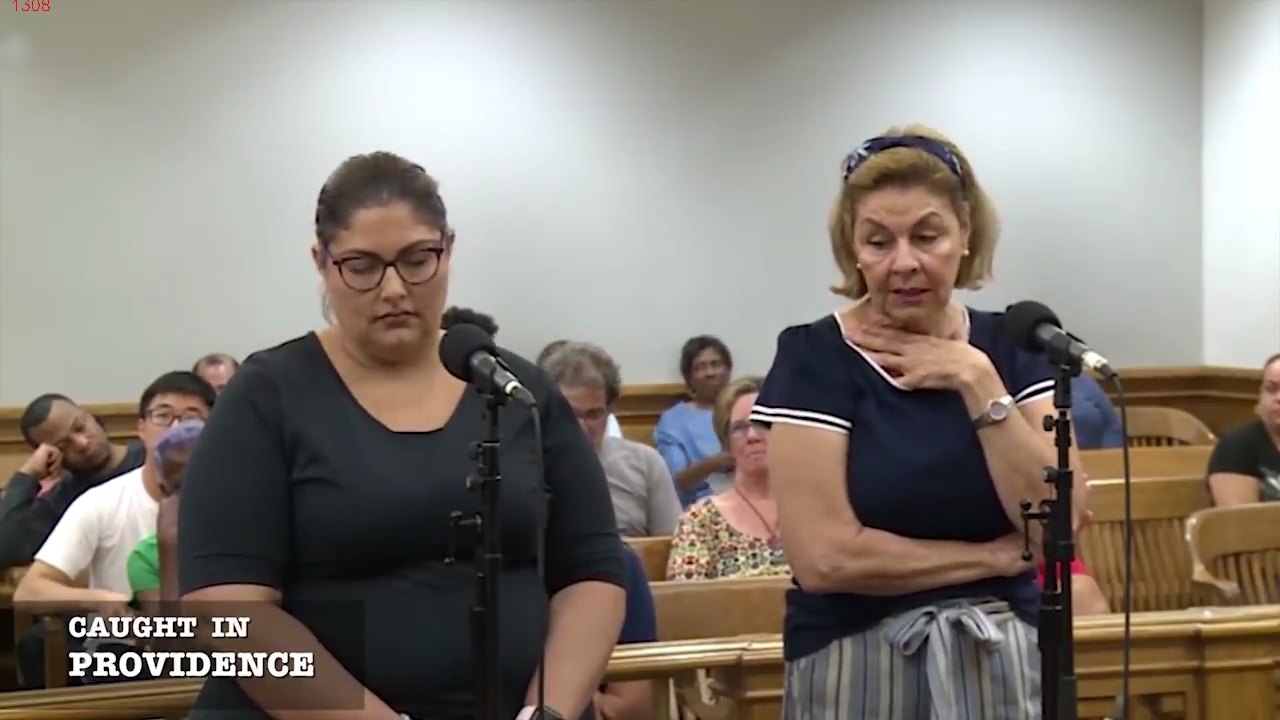

In [44]:
Image.fromarray(imgs[0][...,::-1])

In [45]:
from insightface.app import FaceAnalysis


In [46]:
app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/arrtz3/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/arrtz3/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/arrtz3/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/arrtz3/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/arrtz3/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

In [47]:
app.prepare(ctx_id=0, det_size=(640, 640))

set det-size: (640, 640)


In [146]:
faces = [(img,app.get(img)) for img in imgs[:1]]

In [147]:
from operator import itemgetter
import numpy as np
first_item = itemgetter(0)
def diag_bbox(face):
    return np.linalg.norm(face['bbox'][:2]-face['bbox'][2:])
def sort_faces(faces):
    img, faces = faces
    faces_diags = [(diag_bbox(face), face, img) for face in faces]
    fd_sorted = sorted(faces_diags, key=first_item)
    return fd_sorted[::-1]
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))    

In [148]:
fs = []
for faces2 in faces:
    fs += sort_faces(faces2)[:2]
    

In [149]:
same_persons = []

In [164]:
face = faces[0][1][0]

In [160]:
rimg = app.draw_on(faces[0][0], faces[0][1])

In [166]:
img = faces[0][0]

In [172]:
x1, y1, x2, y2 = [int(x) for x in face['bbox']]
face_img = img[y1:y2, x1:x2]


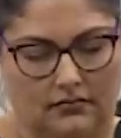

In [174]:
Image.fromarray(face_img[...,::-1])

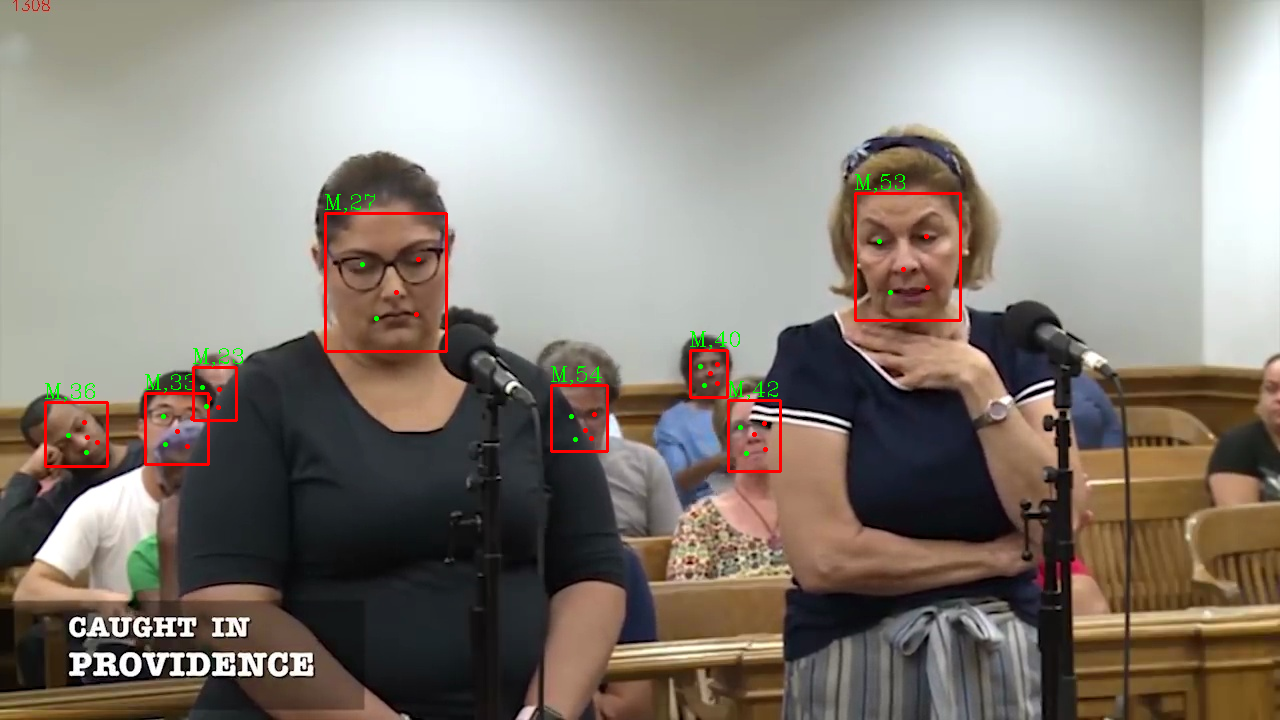

In [155]:
Image.fromarray(rimg[...,::-1])

In [143]:
similarities = []
for i in range(len(fs)-1):
    for j in range(i+1, len(fs)):
        a = fs[i][1]['embedding']
        b = fs[j][1]['embedding']
        similarity = cosine_similarity(a, b)
        if similarity>0.7:
            print('it is the same person')
            img1 = fs[i][-1]
            img2 = fs[j][-1]
            rimg1 = app.draw_on(img1, [fs[i][1]])
            rimg2 = app.draw_on(img2, [fs[j][1]])
            cv2.imwrite(f"./{i}_{j}_t1_output.jpg", rinmg1)
            cv2.imwrite(f"./{i}_{j}_t2_output.jpg", rimg2)
            break
        similarities.append(similarity)
        

it is the same person
it is the same person
it is the same person
it is the same person
it is the same person
it is the same person
it is the same person
it is the same person
it is the same person
it is the same person


In [125]:
from collections import Counter

In [127]:
similarities[0]

0.16219698

In [128]:
c = Counter(similarities)

In [130]:
from matplotlib import pyplot as plt

In [132]:
np.mean(similarities)

0.26179633

In [133]:
np.average(similarities)

0.26179633

{'whiskers': [<matplotlib.lines.Line2D at 0x30852cdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x30853f460>,
 'boxes': [<matplotlib.lines.Line2D at 0x3083e7b20>],
 'medians': [<matplotlib.lines.Line2D at 0x30853f940>],
 'fliers': [<matplotlib.lines.Line2D at 0x30853fc10>],
 'means': []}

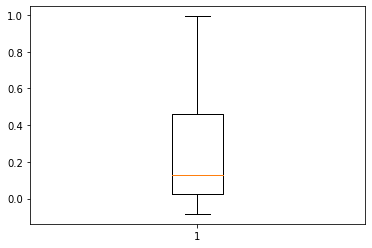

In [131]:
plt.boxplot(similarities)

In [129]:
c.most_common()

[(0.16219698, 1),
 (0.86368084, 1),
 (0.13038732, 1),
 (0.7560969, 1),
 (0.103114106, 1),
 (0.8278541, 1),
 (0.19500922, 1),
 (0.80713856, 1),
 (0.14969589, 1),
 (-0.03000758, 1),
 (-0.0270717, 1),
 (-0.028081635, 1),
 (0.028108312, 1),
 (0.19146575, 1),
 (0.7431517, 1),
 (0.15499623, 1),
 (0.6999166, 1),
 (0.19695766, 1),
 (0.7081666, 1),
 (0.16300015, 1),
 (0.8013803, 1),
 (0.08972842, 1),
 (0.08400833, 1),
 (0.08368448, 1),
 (-0.006965303, 1),
 (0.1667537, 1),
 (0.7516529, 1),
 (0.1299648, 1),
 (0.829215, 1),
 (0.20414521, 1),
 (0.77714884, 1),
 (0.18014513, 1),
 (-0.0006368006, 1),
 (0.0056733335, 1),
 (0.007433253, 1),
 (-0.05790874, 1),
 (0.14826599, 1),
 (0.83585536, 1),
 (0.17580846, 1),
 (0.8646804, 1),
 (0.16707285, 1),
 (0.69999915, 1),
 (0.08149954, 1),
 (0.081478715, 1),
 (0.083105095, 1),
 (0.01736965, 1),
 (0.13961491, 1),
 (0.7998832, 1),
 (0.19254297, 1),
 (0.8909573, 1),
 (0.18897471, 1),
 (0.038677126, 1),
 (0.0418375, 1),
 (0.041266236, 1),
 (0.023715012, 1),
 (0.13

In [99]:
for k, person in persons.items()[:]:
    a = person['embedding']
    similarity = cosine_similarity(a, current_face['embedding'])
    similarities.append(similarities)
    
    

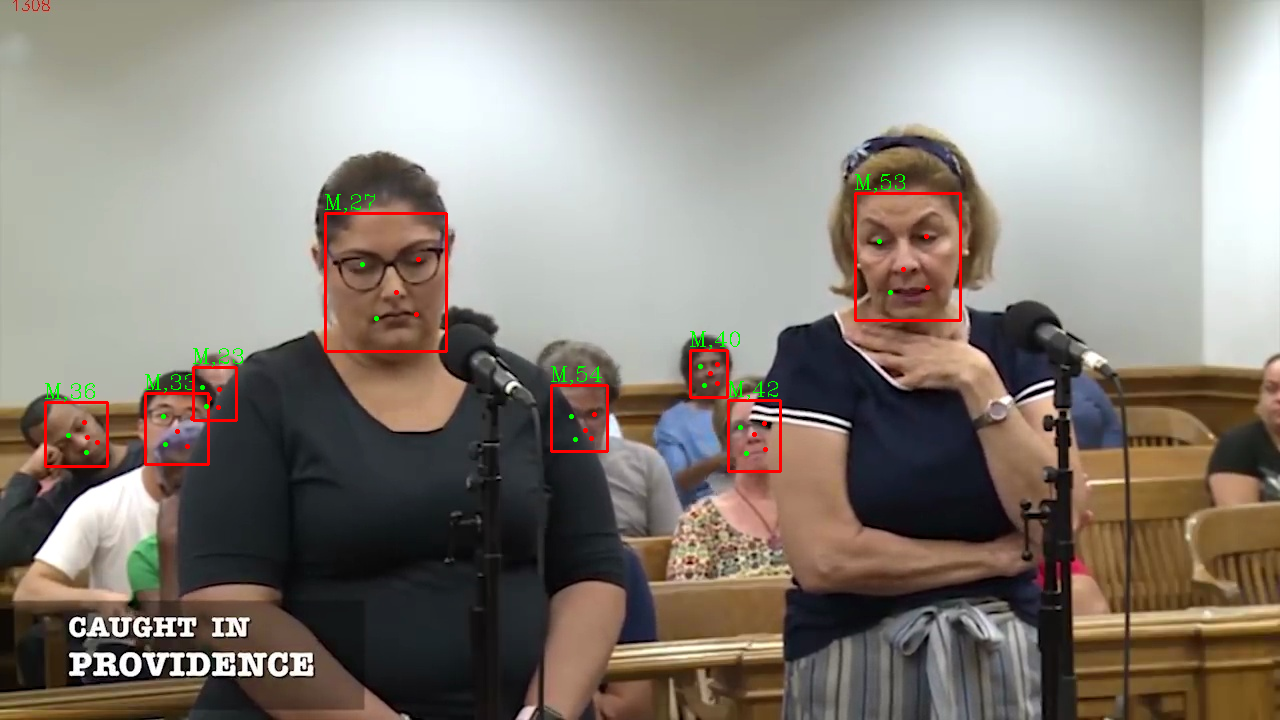

In [52]:
Image.fromarray(rimg[...,::-1])

In [49]:
len(faces[0])

8

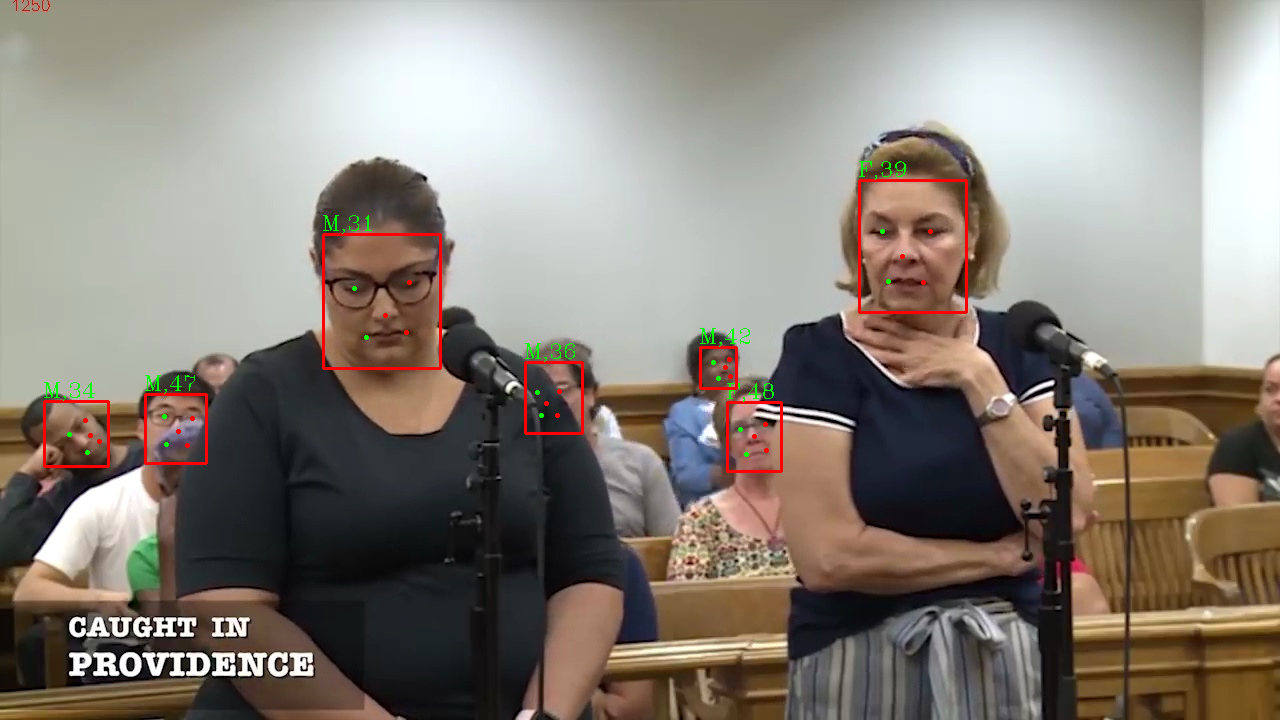

In [53]:
rimg2 = app.draw_on(imgs[1], faces[1])
Image.fromarray(rimg2[...,::-1])

In [33]:
a = faces[0][0]['embedding']
b = faces[1][0]['embedding']

In [34]:
dist = np.linalg.norm(a - b)